In [1]:
pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.4 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5505 sha256=de50361693844792f34c3ea72afa67faa59ba70a5bb22a53e96fe5880640be05
  Stored in directory: /root/.cache/pip/wheels/73/97/4b/f12ac994f6bbb99597396255435824c73ad3916be1e678be55
Successfully built pyfpgrowth


In [2]:
import pandas as pd
import pyfpgrowth as fp
csv_file = 'updated_full_dataset - updated_full_dataset.csv'
df = pd.read_csv(csv_file,header=0,encoding='utf-8')


list_female = []
list_male = []
list_people = []
for i in df['Females in Picture'].index:
    # print(df['Females in Picture'][i])
    if df['Females in Picture'][i]:
        pass
    else:
        list_female.append(i)

for i in df['Males in Picture'].index:
    # print(df['Females in Picture'][i])
    if df['Males in Picture'][i]:
        pass
    else:
        list_male.append(i)

for i in df['Pretrained People in Picture'].index:
    # print(df['Females in Picture'][i])
    if df['Pretrained People in Picture'][i]:
        pass
    else:
        list_people.append(i)
list_all_false = []
for i in list_female:
    ##print('list_female: ',i)
    if i in list_male and i in list_people:
        list_all_false.append(i)
df1 = df.drop(list_all_false)
print(df1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


      Problems Logo                         Title Description  Creator  \
0          NaN  NaN               Scenes et Types         NaN      NaN   
1          NaN  NaN                       Firenze         NaN      NaN   
2          NaN  NaN    Ascension du Mont-Aiguille         NaN      NaN   
7          NaN  NaN                    [no title]         NaN      NaN   
8          NaN  NaN              Royal Deergarden         NaN      NaN   
...        ...  ...                           ...         ...      ...   
26619      NaN  NaN            World War Memorial         NaN      NaN   
26624      NaN  NaN         Xenia Fire Department         NaN      NaN   
26630      NaN  NaN      Yachting on Sandusky Bay         NaN      NaN   
26635      NaN  NaN                          YMCA         NaN      NaN   
26637      NaN  NaN  Youngstown Municipal Airport         NaN      NaN   

         Identifier      Series             Relation  Extent  \
0          B-ALB1-1  Scrapbooks  Bowden Album 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[[9, 9, 9, 9, 9, 6, 4, 4, 4, 4], [9, 9, 9, 9, 9, 6, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


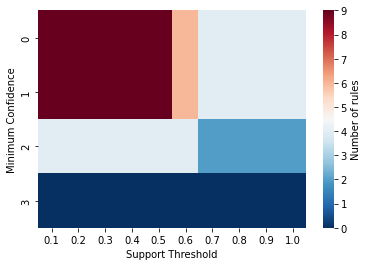

In [6]:
!pip install seaborn
df = [
     ['Milk', 'Bread', 'Saffron'],
     ['Milk', 'Saffron'],
     ['Bread', 'Saffron','Wafer'],
     ['Bread','Wafer'],
 ]
from re import A
import seaborn as sns
data_num=[]
data_num1=[]
data_length={}
for i in range(4):
  FrequentPatterns=fp.find_frequent_patterns(transactions=df,support_threshold=i)
  # print(FrequentPatterns)
  num_list=[]
  num_list1=[]
  for j in range(10):
    # print((j+1)/4)
    Rules=fp.generate_association_rules(patterns=FrequentPatterns,confidence_threshold=float((j+1)/10))
    # print(len(Rules))
    number_of_rules = len(Rules)
    sub_length=0
    if len(Rules)==0:
      avg_length=0
    else:
      for rule in Rules:
        sub_length = sub_length+ len(Rules[rule][0])
      avg_length = sub_length/len(Rules)
    # print('support_threshold=%d,confidence_threshold=%.1f,number of rules=%d,avg length=%.1f'%(i,(j+1)/10,number_of_rules,avg_length))
    num_list.append(number_of_rules)
    num_list1.append(avg_length)
  data_num.append(num_list)
  data_num1.append(num_list1)
    # sup_thres=str(i)+str(j)
    # data_num[sup_thres]=number_of_rules
    # data_length[sup_thres]=avg_length
print(data_num)
col=['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
# row=['']
df1 = pd.DataFrame(data_num,columns=col)
df1
s=sns.heatmap(df1,cmap='RdBu_r')
s.set(xlabel='Support Threshold', ylabel='Minimum Confidence')
s.collections[0].colorbar.set_label("Number of rules")

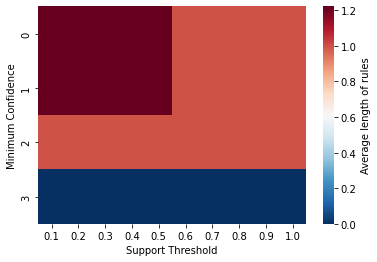

In [7]:
df6 = pd.DataFrame(data_num1,columns=col)
ss=sns.heatmap(df6,cmap='RdBu_r')
ss.set(xlabel='Support Threshold', ylabel='Minimum Confidence')
ss.collections[0].colorbar.set_label("Average length of rules")

In [ ]:
import numpy

df2 = df1[["Location","Photographer","Publisher","Period","Language","Postage","Decade","Digital Publisher","Collection Name","Repository","Females in Picture"]]
transaction_list = []
df3=df1[["Subject"]]
for i in range(len(df2)):
  row=df2.iloc[i].values
  row1=[]
  for j in row:
    # print(type(j))
    if j==str('nan') or pd.isnull(j):
      pass
    else:
      row1.append(str(j))
      # print(j)
    list1 = df3.iloc[i].values
    print(list1[0])
    if pd.isnull(list1[0]):
        continue
    row1=row1+list1[0].split(';')
  transaction_list.append(row1)
print(transaction_list)
resSub = []
patterns = fp.find_frequent_patterns(transaction_list,2)
rules = fp.generate_association_rules(patterns,0.5)
print(rules) 

In [ ]:
for rule in rules:
  if('True' in list(rule)):
    print(f'{rule} -> {rules[rule]}')

Streaming output truncated to the last 5000 lines.
('Aladdin Studio', 'English', 'No', 'Ohio--Columbus', 'Quicksilver', 'True') -> (('Bowden Postcard Collection Online', 'Miami University Libraries', 'Photochrome Period, 1940-Present', 'Walter Havighurst Special Collections Library at Miami University, Oxford, Ohio'), 1.0)
('Aladdin Studio', 'English', 'No', 'Photochrome Period, 1940-Present', 'Quicksilver', 'True') -> (('Bowden Postcard Collection Online', 'Miami University Libraries', 'Ohio--Columbus', 'Walter Havighurst Special Collections Library at Miami University, Oxford, Ohio'), 1.0)
('Aladdin Studio', 'English', 'Ohio--Columbus', 'Photochrome Period, 1940-Present', 'Quicksilver', 'True') -> (('Bowden Postcard Collection Online', 'Miami University Libraries', 'No', 'Walter Havighurst Special Collections Library at Miami University, Oxford, Ohio'), 1.0)
('English', 'No', 'Ohio--Columbus', 'Photochrome Period, 1940-Present', 'Quicksilver', 'True') -> (('Aladdin Studio', 'Bowden P

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
('1920-1929;', 'Braun Post Card Co.', 'No', 'Ohio--Cleveland', 'True', 'Walter Havighurst Special Collections Library at Miami University, Oxford, Ohio') -> (('Bowden Postcard Collection Online', 'English', 'Miami University Libraries', 'White Border Period, 1915-1930'), 1.0)
('1920-1929;', 'Braun Post Card Co.', 'No', 'True', 'Walter Havighurst Special Collections Library at Miami University, Oxford, Ohio', 'White Border Period, 1915-1930') -> (('Bowden Postcard Collection Online', 'English', 'Miami University Libraries', 'Ohio--Cleveland'), 1.0)
('1920-1929;', 'Braun Post Card Co.', 'Ohio--Cleveland', 'True', 'Walter Havighurst Special Collections Library at Miami University, Oxford, Ohio', 'White Border Period, 1915-1930') -> (('Bowden Postcard Collection Online', 'English', 'Miami University Libraries', 'No'), 1.0)
('1920-1929;', 'No', 'Ohio--Cleveland', 'True', 'Walter Havighurst Special Collections Library at Miami University, Ox